In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import isnull

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'experiment.p')

stakeDelegateds: 706 events
stakeDelegatedLockeds: 474 events
stakeDelegatedWithdrawns: 331 events
allocationCloseds: 84 events
allocationCollecteds: 18 events
stakeDepositeds: 36 events
rewardsAssigneds: 84 events
delegationParametersUpdateds: 9 events
allocationCreateds: 93 events
TOTAL NUMBER OF EVENTS: 1867
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1867 to capture all events.



In [2]:
df

indexers  simulation  subset  \
12     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
24     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
36     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
48     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
60     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
...                                                  ...         ...     ...   
22356  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
22368  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
22380  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
22392  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   
22404  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...           0       0   

       run  substep  timestep  \
12       1       12         1   
24       1       12         2   
36       1       12         3   
48       1       12         4   
60       1       12         5   
...    ...      ...       ...   
22356    1       12      1863   
22368    1       12      1864   
22380    1       12      1865   
22392    1       12      1866   
22404    1       12      1867   

                             cumulative_indexing_revenue  \
12     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
24     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
36     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
48     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
60     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
...                                                  ...   
22356  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
22368  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
22380  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
22392  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   
22404  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...   

                                cumulative_query_revenue  
12     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
24     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
36     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
48     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
60     {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
...                                                  ...  
22356  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
22368  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
22380  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
22392  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  
22404  {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...  

[1867 rows x 8 columns]

In [3]:
df['indexers'][60]['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].delegators

{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea': self.id='0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea', self.shares=Decimal('165851.137200000000000000'),
 '0xd776a7306ee6a060cebb46b46d305e88fd39ba84': self.id='0xd776a7306ee6a060cebb46b46d305e88fd39ba84', self.shares=Decimal('251819.6446500000000000000001')}

In [4]:
indexers = df['indexers']
indexer_values = {}
timestep = 0
for i in indexers:
    for indexer_id, values in i.items():
        if indexer_id not in indexer_values:
            indexer_values[indexer_id] = {}
        indexer_values[indexer_id][timestep] = values.delegators
    timestep += 1
indexer_values_df = pd.DataFrame(indexer_values)
for i in indexer_values_df.columns:
    indexer_values_df[i] = [{} if j != j else j for j in indexer_values_df[i]]
indexer_values_df

0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e  \
0                                                    {}   
1                                                    {}   
2     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
3     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
4     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
...                                                 ...   
1862  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1863  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1864  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1865  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1866  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   

             0xfb5b40098cdfec1564ae5b94d4deed116b887d08  \
0                                                    {}   
1                                                    {}   
2                                                    {}   
3                                                    {}   
4                                                    {}   
...                                                 ...   
1862  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1863  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1864  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1865  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1866  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   

             0xd133fd8e0607f5d82c91626140495ea0a31d0398  
0                                                    {}  
1                                                    {}  
2                                                    {}  
3                                                    {}  
4                                                    {}  
...                                                 ...  
1862  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...  
1863  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...  
1864  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...  
1865  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...  
1866  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...  

[1867 rows x 3 columns]

In [5]:
indexer_df_1 = indexer_values_df['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e']
delegator_shares = []
delegator_dict = {}
timestep = 0

for i in indexer_values_df.columns:
    for j in indexer_values_df[i]:
        for delegator_id, delegator in j.items():
            if delegator_id not in delegator_dict:
                delegator_dict[delegator_id] = {}
            delegator_dict[delegator_id][timestep] = float(delegator.shares)
        timestep += 1
    delegator_shares.append(delegator_dict)
    delegator_dict = {}

In [6]:
pd.DataFrame(delegator_shares)

0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea  \
0  {2: 165851.1372, 3: 165851.1372, 4: 165851.137...   
1                                                NaN   
2                                                NaN   

          0xd776a7306ee6a060cebb46b46d305e88fd39ba84  \
0  {3: 251819.64465, 4: 251819.64465, 5: 251819.6...   
1                                                NaN   
2                                                NaN   

          0x53c0fa070e310ce1690b3c83b2ab7f20d74d4922  \
0  {6: 6965.0, 7: 6965.0, 8: 6965.0, 9: 6965.0, 1...   
1                                                NaN   
2                                                NaN   

          0x9327775e225a703125167eb423d246915bdc37e7  \
0  {7: 9950.0, 8: 9950.0, 9: 9850.0, 10: 9850.0, ...   
1                                                NaN   
2                                                NaN   

          0x32345932bc863f54ef87e2ece3d458f1789b1bfc  \
0  {8: 1991.7586625, 9: 1991.7586625, 10: 1991.75...   
1                                                NaN   
2                                                NaN   

          0xb300749c08cab1c9ce67f66a18ea5926360ba36a  \
0  {10: 503.90508365, 11: 503.90508365, 12: 503.9...   
1                                                NaN   
2                                                NaN   

          0x57b4a5f470c85d4281f7baf5162b59243a3491df  \
0  {11: 65257.075, 12: 0.0, 13: 0.0, 14: 0.0, 15:...   
1                                                NaN   
2                                                NaN   

          0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed  \
0  {14: 39800.0, 15: 39800.0, 16: 39800.0, 17: 39...   
1                                                NaN   
2                                                NaN   

          0xf5376e847efa1ea889bfcb03706f414dade0e82c  \
0  {15: 12488.5676239939, 16: 12488.5676239939, 1...   
1                                                NaN   
2                                                NaN   

          0x1853bf6a892abd949aed052bb634ab96afaf31dd  ...  \
0  {16: 14169.714085664846, 17: 14169.71408566484...  ...   
1                                                NaN  ...   
2                                                NaN  ...   

          0x38877923cc7ddf46e0eb4753b365d16ff5d7dbdf  \
0                                                NaN   
1                                                NaN   
2  {5167: 116083.65505, 5168: 116083.65505, 5169:...   

          0x0a2371c85b103c36911cb0ee590f116414a8129a  \
0                                                NaN   
1                                                NaN   
2  {5168: 116083.65505, 5169: 116083.65505, 5170:...   

          0x8a31e5dc327f2e256871546ff4b5a24b536b71e7  \
0                                                NaN   
1                                                NaN   
2  {5169: 116083.65505, 5170: 116083.65505, 5171:...   

          0xe2220444f332baf7413fdb2e8c5f327d6269a6e7  \
0                                                NaN   
1                                                NaN   
2  {5170: 116083.65505, 5171: 116083.65505, 5172:...   

          0x1cdcfbde69fcbb0cfe6e1e5c600e7b92109ce036  \
0                                                NaN   
1                                                NaN   
2  {5171: 116083.65505, 5172: 116083.65505, 5173:...   

          0x8c355f0fecdd41e5b3df2f6a7687de765713426e  \
0                                                NaN   
1                                                NaN   
2  {5172: 116083.65505, 5173: 116083.65505, 5174:...   

          0x1d078b29b012623ba7ea7dcc80cd44f13d8b6e10  \
0                                                NaN   
1                                                NaN   
2  {5173: 116083.65505, 5174: 116083.65505, 5175:...   

          0x5fdd19387a6b10a8f627a4111aea4b1c769914fa  \
0                                                NaN   
1                                                NaN 

# Delegator Shares By Indexer

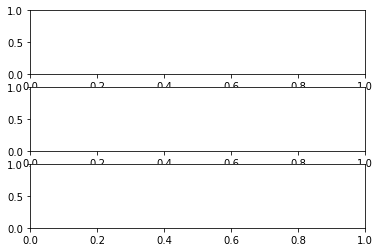

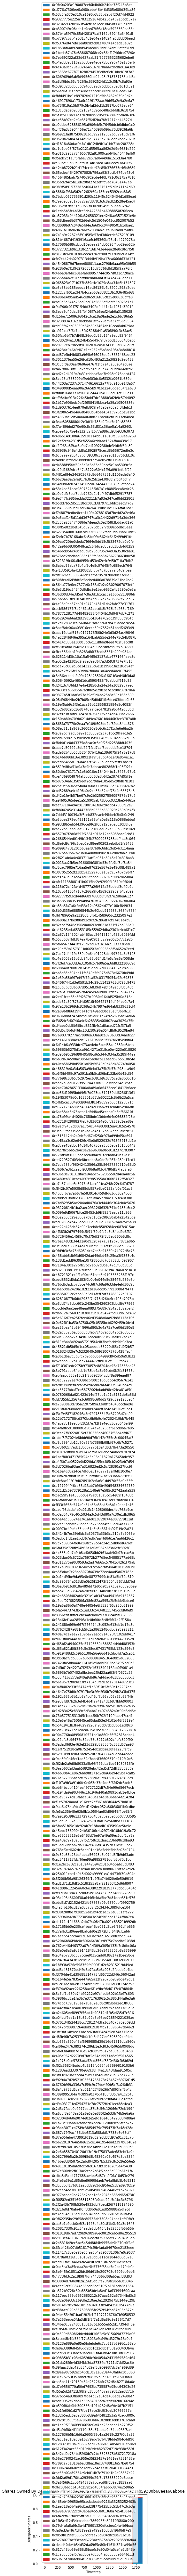

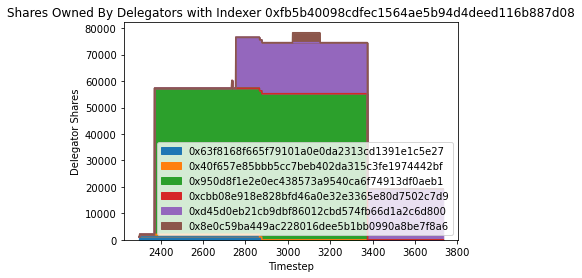

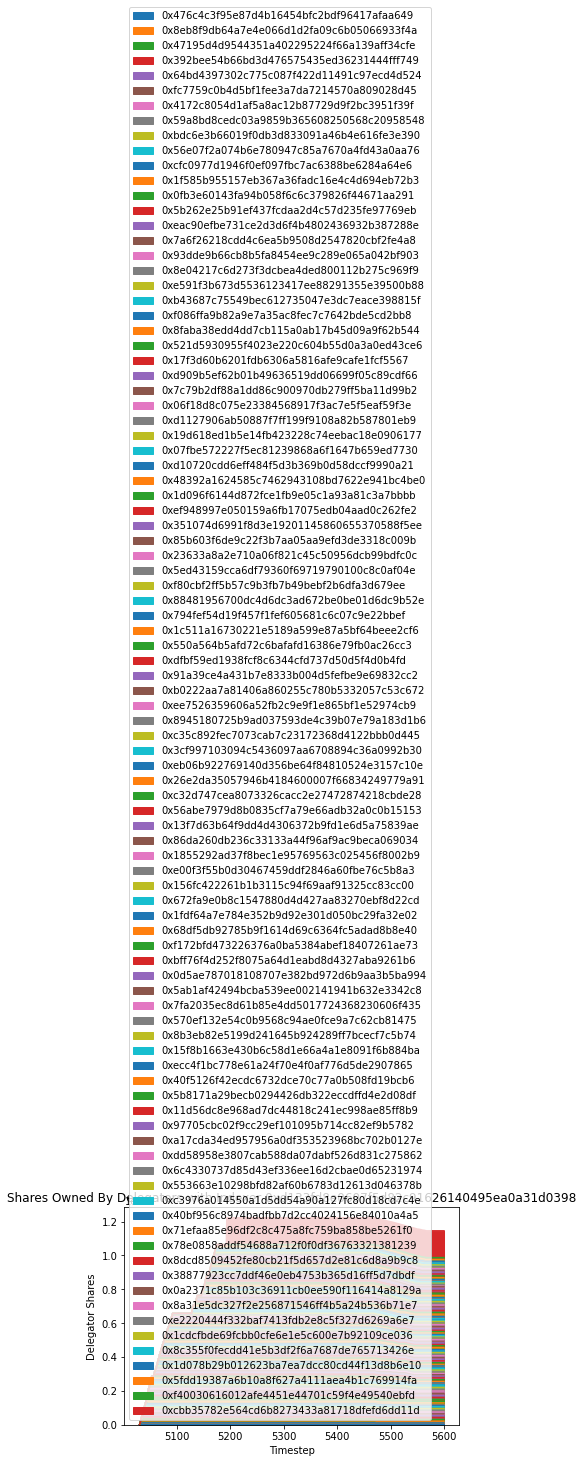

In [7]:
fig, axs = plt.subplots(len(delegator_shares))
for i in range(len(delegator_shares)):
    delegator_df = pd.DataFrame(delegator_shares[i])
    axs[i] = delegator_df.plot(kind = 'area')
    axs[i].set_title(f'Shares Owned By Delegators with Indexer {indexer_values_df.columns[i]}')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylabel('Delegator Shares')

In [9]:
df_plot

0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea  \
0  {2: 165851.1372, 3: 165851.1372, 4: 165851.137...   
1                                                NaN   
2                                                NaN   

          0xd776a7306ee6a060cebb46b46d305e88fd39ba84  \
0  {3: 251819.64465, 4: 251819.64465, 5: 251819.6...   
1                                                NaN   
2                                                NaN   

          0x53c0fa070e310ce1690b3c83b2ab7f20d74d4922  \
0  {6: 6965.0, 7: 6965.0, 8: 6965.0, 9: 6965.0, 1...   
1                                                NaN   
2                                                NaN   

          0x9327775e225a703125167eb423d246915bdc37e7  \
0  {7: 9950.0, 8: 9950.0, 9: 9850.0, 10: 9850.0, ...   
1                                                NaN   
2                                                NaN   

          0x32345932bc863f54ef87e2ece3d458f1789b1bfc  \
0  {8: 1991.7586625, 9: 1991.7586625, 10: 1991.75...   
1                                                NaN   
2                                                NaN   

          0xb300749c08cab1c9ce67f66a18ea5926360ba36a  \
0  {10: 503.90508365, 11: 503.90508365, 12: 503.9...   
1                                                NaN   
2                                                NaN   

          0x57b4a5f470c85d4281f7baf5162b59243a3491df  \
0  {11: 65257.075, 12: 0.0, 13: 0.0, 14: 0.0, 15:...   
1                                                NaN   
2                                                NaN   

          0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed  \
0  {14: 39800.0, 15: 39800.0, 16: 39800.0, 17: 39...   
1                                                NaN   
2                                                NaN   

          0xf5376e847efa1ea889bfcb03706f414dade0e82c  \
0  {15: 12488.5676239939, 16: 12488.5676239939, 1...   
1                                                NaN   
2                                                NaN   

          0x1853bf6a892abd949aed052bb634ab96afaf31dd  ...  \
0  {16: 14169.714085664846, 17: 14169.71408566484...  ...   
1                                                NaN  ...   
2                                                NaN  ...   

          0x38877923cc7ddf46e0eb4753b365d16ff5d7dbdf  \
0                                                NaN   
1                                                NaN   
2  {5167: 116083.65505, 5168: 116083.65505, 5169:...   

          0x0a2371c85b103c36911cb0ee590f116414a8129a  \
0                                                NaN   
1                                                NaN   
2  {5168: 116083.65505, 5169: 116083.65505, 5170:...   

          0x8a31e5dc327f2e256871546ff4b5a24b536b71e7  \
0                                                NaN   
1                                                NaN   
2  {5169: 116083.65505, 5170: 116083.65505, 5171:...   

          0xe2220444f332baf7413fdb2e8c5f327d6269a6e7  \
0                                                NaN   
1                                                NaN   
2  {5170: 116083.65505, 5171: 116083.65505, 5172:...   

          0x1cdcfbde69fcbb0cfe6e1e5c600e7b92109ce036  \
0                                                NaN   
1                                                NaN   
2  {5171: 116083.65505, 5172: 116083.65505, 5173:...   

          0x8c355f0fecdd41e5b3df2f6a7687de765713426e  \
0                                                NaN   
1                                                NaN   
2  {5172: 116083.65505, 5173: 116083.65505, 5174:...   

          0x1d078b29b012623ba7ea7dcc80cd44f13d8b6e10  \
0                                                NaN   
1                                                NaN   
2  {5173: 116083.65505, 5174: 116083.65505, 5175:...   

          0x5fdd19387a6b10a8f627a4111aea4b1c769914fa  \
0                                                NaN   
1                                                NaN 

# Withdraw Frequency

In [10]:
withdraw_events_dict = withdraw_events

In [11]:
withdraw_events_df = pd.DataFrame(withdraw_events_dict).T

In [12]:
withdraw_events_df[0]

663     {'timestep': 663, 'allocationID': nan, 'blockN...
664     {'timestep': 664, 'allocationID': nan, 'blockN...
665     {'timestep': 665, 'allocationID': nan, 'blockN...
666     {'timestep': 666, 'allocationID': nan, 'blockN...
669     {'timestep': 669, 'allocationID': nan, 'blockN...
                              ...                        
1840    {'timestep': 1840, 'allocationID': nan, 'block...
1842    {'timestep': 1842, 'allocationID': nan, 'block...
1850    {'timestep': 1850, 'allocationID': nan, 'block...
1864    {'timestep': 1864, 'allocationID': nan, 'block...
1866    {'timestep': 1866, 'allocationID': nan, 'block...
Name: 0, Length: 331, dtype: object

In [13]:
withdraw_events_df = pd.DataFrame(list(withdraw_events_df[0]))

In [14]:
withdraw_events_df

timestep  allocationID  blockNumber  epoch  \
0         663           NaN     11659457    NaN   
1         664           NaN     11659462    NaN   
2         665           NaN     11660534    NaN   
3         666           NaN     11661884    NaN   
4         669           NaN     11663435    NaN   
..        ...           ...          ...    ...   
326      1840           NaN     13126704    NaN   
327      1842           NaN     13136396    NaN   
328      1850           NaN     13174909    NaN   
329      1864           NaN     13198650    NaN   
330      1866           NaN     13204873    NaN   

                                                    id  \
0    0xeb61d501f54d4bad4ea105d09de363ab8c6ff06830d7...   
1    0x536594f889395a7ea8ea8d7d173ef48f5e78acf31a4f...   
2    0x832595066ea463a1ecc46d05f6d6e32e75ef0e950e88...   
3    0x491c394eb8522ade3ed63cf112fa75040bad5801d642...   
4    0xd84038f1f19167aba105c54ef1e22af798e9642fce1f...   
..                                                 ...   
326  0xc6c26a0d0dd2b1310a81372f13861c586019c3c8762b...   
327  0xb8a4f90c96356c1ee4a95663540a8a744964abc7d42c...   
328  0xb91f0ff87a86c03f6a4d9b71b1360bd50e653ed71a96...   
329  0x9b8c9540452d43429777e62115c49cdf36f4e66c7d18...   
330  0xadeae2f207f265837ba908bc068bc43c1eb81a272712...   

                                        indexer  logIndex  \
0    0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       131   
1    0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       135   
2    0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e        48   
3    0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e        75   
4    0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       168   
..                                          ...       ...   
326  0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       352   
327  0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e        85   
328  0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       533   
329  0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       415   
330  0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e       248   

     subgraphDeploymentID                     tokens  \
0                     NaN   12488.567623993900000000   
1                     NaN   14169.714085664846000000   
2                     NaN  251819.644650000000000000   
3                     NaN    6505.310000000000000000   
4                     NaN   65257.075000000000000000   
..                    ...                        ...   
326                   NaN    1585.460560448869413726   
327                   NaN    1210.379275918828012360   
328                   NaN    1334.564835463986724370   
329                   NaN    1008.649396599023343633   
330                   NaN     822.296066488708688974   

                         type  ...  from  rebateFees  \
0    stakeDelegatedWithdrawns  ...   NaN         NaN   
1    stakeDelegatedWithdrawns  ...   NaN         NaN   
2    stakeDelegatedWithdrawns  ...   NaN         NaN   
3    stakeDelegatedWithdrawns  ...   NaN         NaN   
4    stakeDelegatedWithdrawns  ...   NaN         NaN   
..                        ...  ...   ...         ...   
326  stakeDelegatedWithdrawns  ...   NaN         NaN   
327  stakeDelegatedWithdrawns  ...   NaN         NaN   
328  stakeDelegatedWithdrawns  ...   NaN         NaN   
329  stakeDelegatedWithdrawns  ...   NaN         NaN   
330  stakeDelegatedWithdrawns  ...   NaN         NaN   

                                      delegator  shares  eventTime until  \
0    0xf5376e847efa1ea889bfcb03706f414dade0e82c       0        NaN   NaN   
1    0x1853bf6a892abd949aed052bb634ab96afaf31dd       0        NaN   NaN   
2    0xd776a7306ee6a060cebb46b46d305e88fd39ba84       0        NaN   NaN   
3    0x81b4687d4193916aa6cf65360bf96b1e4279278a       0        NaN   NaN   
4    0x57b4a5f470c85d4281f7baf5162b59243a3491df       0        NaN   NaN   
..                                          ...     ...        ...   ...   
326  0x9306746b60ccbc1ebf22c4c373f6c040710844a1       0        NaN   NaN   
327  0x6

In [22]:
withdraw_hist_df = indexer_values_df.merge(withdraw_events_df, how = 'outer', left_on = indexer_values_df.index, right_on = 'timestep')

In [23]:
withdraw_hist_df

0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e  \
0                                                    {}   
1                                                    {}   
2     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
3     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
4     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
...                                                 ...   
1862  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1863  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1864  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1865  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1866  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   

             0xfb5b40098cdfec1564ae5b94d4deed116b887d08  \
0                                                    {}   
1                                                    {}   
2                                                    {}   
3                                                    {}   
4                                                    {}   
...                                                 ...   
1862  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1863  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1864  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1865  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1866  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   

             0xd133fd8e0607f5d82c91626140495ea0a31d0398  timestep  \
0                                                    {}         0   
1                                                    {}         1   
2                                                    {}         2   
3                                                    {}         3   
4                                                    {}         4   
...                                                 ...       ...   
1862  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1862   
1863  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1863   
1864  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1864   
1865  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1865   
1866  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1866   

      allocationID  blockNumber  epoch  \
0              NaN          NaN    NaN   
1              NaN          NaN    NaN   
2              NaN          NaN    NaN   
3              NaN          NaN    NaN   
4              NaN          NaN    NaN   
...            ...          ...    ...   
1862           NaN          NaN    NaN   
1863           NaN          NaN    NaN   
1864           NaN   13198650.0    NaN   
1865           NaN          NaN    NaN   
1866           NaN   13204873.0    NaN   

                                                     id  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1862                                                NaN   
1863                                                NaN   
1864  0x9b8c9540452d43429777e62115c49cdf36f4e66c7d18...   
1865                                                NaN   
1866  0xadeae2f207f265837ba908bc068bc43c1eb81a272712...   

                                         indexer  logIndex  ...  from  \
0                                            NaN       NaN  ...   NaN   
1                                            NaN       NaN  ...   NaN   
2                                            NaN       NaN  ...   NaN   
3                                            NaN       NaN  ...   NaN   
4                                            NaN       NaN  ...   NaN   
...                                          ...       ...  ...   ...   
1862                                     

In [26]:
for i in indexer_values_df.columns:
    withdraw_hist_df[f'{i}_withdraw'] = [1 if j == i else 0 for j in withdraw_hist_df['indexer']]
withdraw_hist_df

0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e  \
0                                                    {}   
1                                                    {}   
2     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
3     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
4     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
...                                                 ...   
1862  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1863  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1864  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1865  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1866  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   

             0xfb5b40098cdfec1564ae5b94d4deed116b887d08  \
0                                                    {}   
1                                                    {}   
2                                                    {}   
3                                                    {}   
4                                                    {}   
...                                                 ...   
1862  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1863  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1864  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1865  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1866  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   

             0xd133fd8e0607f5d82c91626140495ea0a31d0398  timestep  \
0                                                    {}         0   
1                                                    {}         1   
2                                                    {}         2   
3                                                    {}         3   
4                                                    {}         4   
...                                                 ...       ...   
1862  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1862   
1863  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1863   
1864  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1864   
1865  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1865   
1866  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1866   

      allocationID  blockNumber  epoch  \
0              NaN          NaN    NaN   
1              NaN          NaN    NaN   
2              NaN          NaN    NaN   
3              NaN          NaN    NaN   
4              NaN          NaN    NaN   
...            ...          ...    ...   
1862           NaN          NaN    NaN   
1863           NaN          NaN    NaN   
1864           NaN   13198650.0    NaN   
1865           NaN          NaN    NaN   
1866           NaN   13204873.0    NaN   

                                                     id  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1862                                                NaN   
1863                                                NaN   
1864  0x9b8c9540452d43429777e62115c49cdf36f4e66c7d18...   
1865                                                NaN   
1866  0xadeae2f207f265837ba908bc068bc43c1eb81a272712...   

                                         indexer  logIndex  ...  shares  \
0                                            NaN       NaN  ...     NaN   
1                                            NaN       NaN  ...     NaN   
2                                            NaN       NaN  ...     NaN   
3                                            NaN       NaN  ...     NaN   
4                                            NaN       NaN  ...     NaN   
...                                          ...       ...  ...     ...   
1862                       

In [25]:
indexers

12       {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
24       {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
36       {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
48       {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
60       {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
                               ...                        
22356    {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22368    {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22380    {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22392    {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
22404    {'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
Name: indexers, Length: 1867, dtype: object

In [31]:
indexer_values_df.columns[0]

'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'

In [52]:
withdraw_hist_df.iloc[:, -1].sum()

0

In [61]:
axs[1]

array([(array([   0.,    0.,    0.,    0.,    0., 1867.,    0.,    0.,    0.,
                 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>),
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

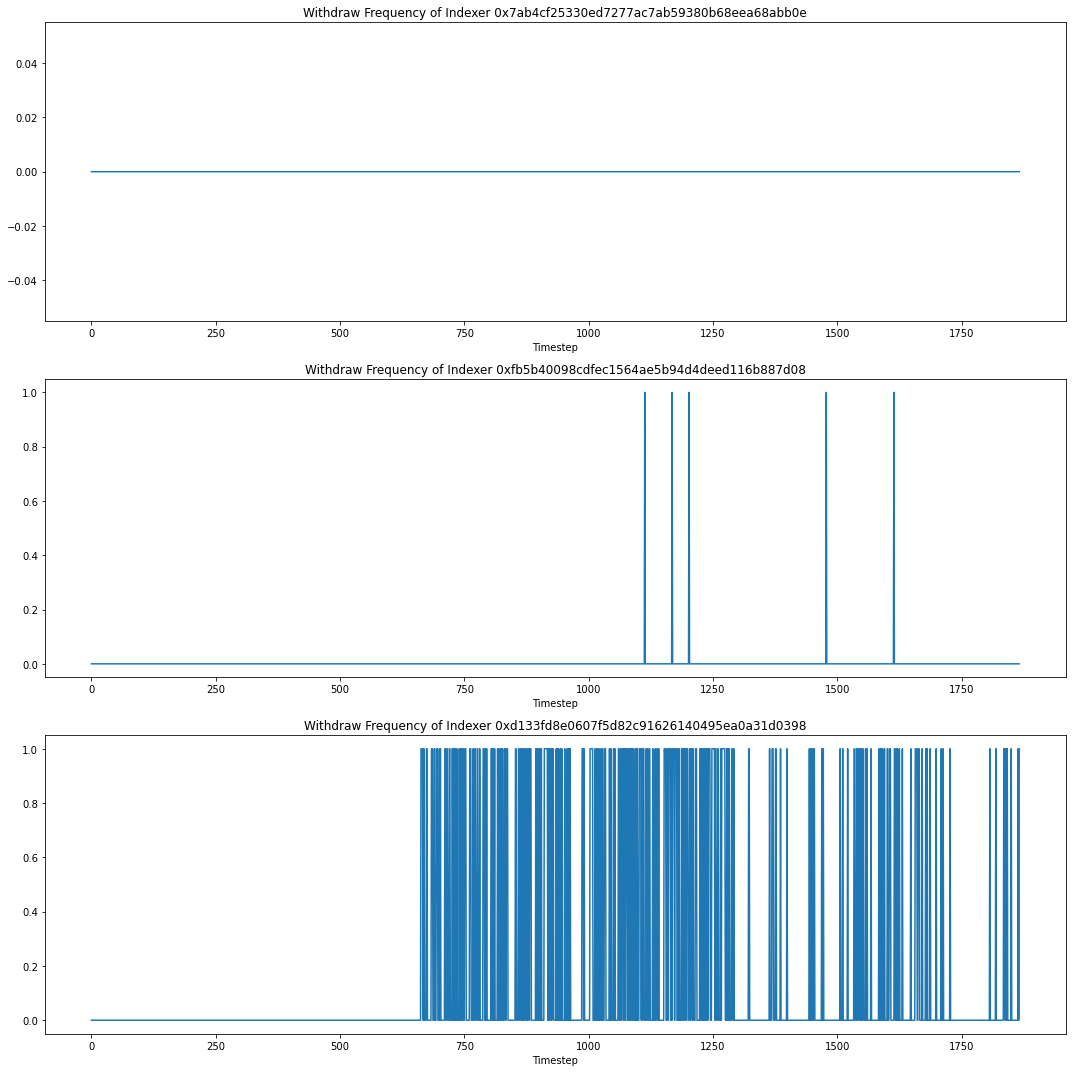

In [76]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i in range(len(indexer_values_df.columns)):
    axs[i].plot(withdraw_hist_df.timestep, withdraw_hist_df.iloc[:, (i+1) * -1])
    axs[i].set_title(f'Withdraw Frequency of Indexer {indexer_values_df.columns[i]}')
    axs[i].set_xlabel('Timestep')
fig.tight_layout()

In [ ]:
withdraw_hist_df.iterrows()

In [79]:
for i in indexer_values_df.columns:
    withdraw_hist_df[f'{i}_withdraw_weighted'] = [j['tokens'] if j['indexer'] == i  else 0 for k, j in withdraw_hist_df.iterrows()]
withdraw_hist_df

0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e  \
0                                                    {}   
1                                                    {}   
2     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
3     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
4     {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
...                                                 ...   
1862  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1863  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1864  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1865  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   
1866  {'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...   

             0xfb5b40098cdfec1564ae5b94d4deed116b887d08  \
0                                                    {}   
1                                                    {}   
2                                                    {}   
3                                                    {}   
4                                                    {}   
...                                                 ...   
1862  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1863  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1864  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1865  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   
1866  {'0x63f8168f665f79101a0e0da2313cd1391e1c5e27':...   

             0xd133fd8e0607f5d82c91626140495ea0a31d0398  timestep  \
0                                                    {}         0   
1                                                    {}         1   
2                                                    {}         2   
3                                                    {}         3   
4                                                    {}         4   
...                                                 ...       ...   
1862  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1862   
1863  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1863   
1864  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1864   
1865  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1865   
1866  {'0x476c4c3f95e87d4b16454bfc2bdf96417afaa649':...      1866   

      allocationID  blockNumber  epoch  \
0              NaN          NaN    NaN   
1              NaN          NaN    NaN   
2              NaN          NaN    NaN   
3              NaN          NaN    NaN   
4              NaN          NaN    NaN   
...            ...          ...    ...   
1862           NaN          NaN    NaN   
1863           NaN          NaN    NaN   
1864           NaN   13198650.0    NaN   
1865           NaN          NaN    NaN   
1866           NaN   13204873.0    NaN   

                                                     id  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1862                                                NaN   
1863                                                NaN   
1864  0x9b8c9540452d43429777e62115c49cdf36f4e66c7d18...   
1865                                                NaN   
1866  0xadeae2f207f265837ba908bc068bc43c1eb81a272712...   

                                         indexer  logIndex  ...  \
0                                            NaN       NaN  ...   
1                                            NaN       NaN  ...   
2                                            NaN       NaN  ...   
3                                            NaN       NaN  ...   
4                                            NaN       NaN  ...   
...                                          ...       ...  ...   
1862                                         NaN       NaN  ...   
1863            

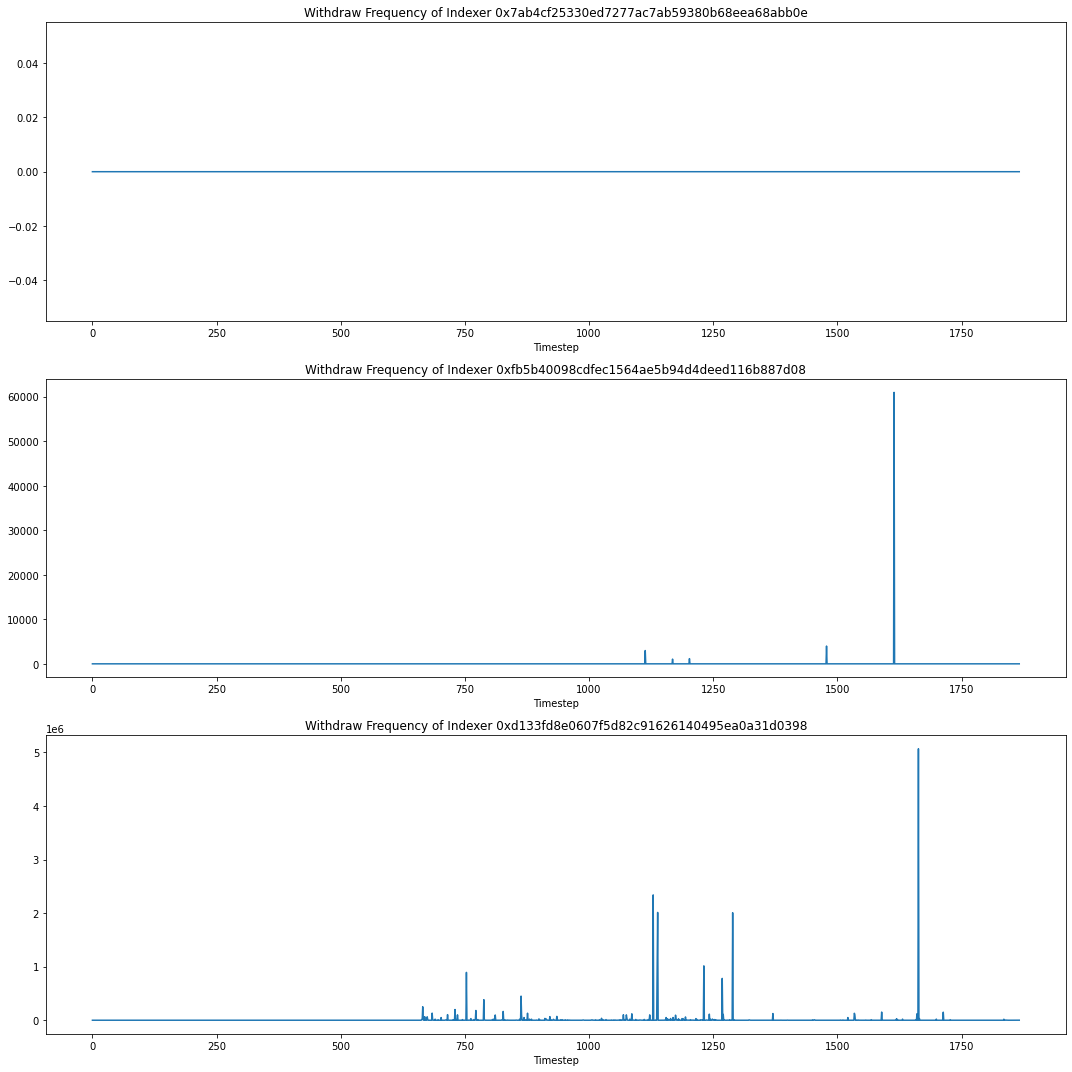

In [80]:
fig, axs = plt.subplots(len(delegator_shares), figsize = (15,15))
for i in range(len(indexer_values_df.columns)):
    axs[i].plot(withdraw_hist_df.timestep, withdraw_hist_df.iloc[:, (i+1) * -1])
    axs[i].set_title(f'Withdraw Frequency of Indexer {indexer_values_df.columns[i]}')
    axs[i].set_xlabel('Timestep')
fig.tight_layout()